# Part 1 - English to Farsi










In [1]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [2]:
%cd '/content/drive/My Drive/Corpora/'

/content/drive/My Drive/Corpora


In [3]:
import os 
os.listdir('.')

['En2Fa-Translation',
 'Transliteration',
 'OpenNMT-py',
 'model_step_5000.pt',
 'model_step_10000.pt']

# Git Clone
First Git clone the OpenNMT source

In [0]:
!git clone https://github.com/OpenNMT/OpenNMT-py

fatal: destination path 'OpenNMT-py' already exists and is not an empty directory.


# Please install requirements.txt use by pip

> Error : You must restart the runtime in order to use newly installed versions.<br>
Solution : Click Restart Runtime => Redo



In [0]:
!pip install -r ./OpenNMT-py/floyd_requirements.txt

  Cloning https://github.com/pytorch/text to /tmp/pip-req-build-cg4kru45
  Running command git clone -q https://github.com/pytorch/text /tmp/pip-req-build-cg4kru45
  Running command git submodule update --init --recursive -q
     |████████████████████████████████| 1.1MB 2.7MB/s 
  Created wheel for torchtext: filename=torchtext-0.6.0a0+e709553-cp36-cp36m-linux_x86_64.whl size=2149165 sha256=667bb39f1c43bfc2eae725e85f3f385e215e790aeee5703a9a2bbe80b9ba46ec
  Stored in directory: /tmp/pip-ephem-wheel-cache-knnp7e71/wheels/73/14/71/ed033fd999ae4933e17df3e91be2014e61c2f312a88a164ff5
Successfully built torchtext
  Found existing installation: torchtext 0.3.1
    Uninstalling torchtext-0.3.1:
      Successfully uninstalled torchtext-0.3.1


In [12]:
!pip install torchtext==0.4

     |████████████████████████████████| 61kB 1.9MB/s 
  Found existing installation: torchtext 0.3.1
    Uninstalling torchtext-0.3.1:
      Successfully uninstalled torchtext-0.3.1


In [11]:
!pip install configargparse

     |████████████████████████████████| 51kB 1.7MB/s 
  Created wheel for configargparse: filename=ConfigArgParse-1.2.3-cp36-none-any.whl size=19328 sha256=59d4e61e390ae9f645f1dcd56e1bd9470dad56aa0ade01d481840d7cf9611244
  Stored in directory: /root/.cache/pip/wheels/bd/d6/53/034032da9498bda2385cd50a51a289e88090b5da2d592b1fdf
Successfully built configargparse


# Q1: RNN + No bpe

### Preprocess

In [0]:
!python OpenNMT-py/preprocess.py -train_src En2Fa-Translation/Train/train.en -train_tgt En2Fa-Translation/Train/train.fa -valid_src En2Fa-Translation/Dev/dev.en -valid_tgt En2Fa-Translation/Dev/dev.fa -save_data En2Fa-Translation/Cleaned

[2020-06-01 10:43:42,869 INFO] Extracting features...
[2020-06-01 10:43:44,310 INFO]  * number of source features: 0.
[2020-06-01 10:43:44,311 INFO]  * number of target features: 0.
[2020-06-01 10:43:44,311 INFO] Building `Fields` object...
[2020-06-01 10:43:44,311 INFO] Building & saving training data...
[2020-06-01 10:43:45,611 INFO] Building shard 0.
[2020-06-01 10:43:46,596 INFO]  * saving 0th train data shard to En2Fa-Translation/Cleaned.train.0.pt.
[2020-06-01 10:43:47,441 INFO]  * tgt vocab size: 5908.
[2020-06-01 10:43:47,445 INFO]  * src vocab size: 3116.
[2020-06-01 10:43:47,522 INFO] Building & saving validation data...
[2020-06-01 10:43:48,907 INFO] Building shard 0.
[2020-06-01 10:43:48,913 INFO]  * saving 0th valid data shard to En2Fa-Translation/Cleaned.valid.0.pt.


### Train

In [0]:
!nvidia-smi

Mon Jun  1 10:48:02 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
os.listdir('En2Fa-Translation')

['Train',
 'Dev',
 'Test',
 'Cleaned',
 'Cleaned.train.0.pt',
 'Cleaned.vocab.pt',
 'Cleaned.valid.0.pt']

#### RNN

In [0]:
!python OpenNMT-py/train.py -data En2Fa-Translation/Cleaned -save_model En2Fa-Translation/rnn_model -world_size 1 -gpu_rank 0 --rnn_size 512 --layers 4 --rnn_type LSTM -train_steps 50000

[2020-06-01 12:34:06,935 INFO]  * src vocab size = 3116
[2020-06-01 12:34:06,935 INFO]  * tgt vocab size = 5908
[2020-06-01 12:34:06,935 INFO] Building model...
[2020-06-01 12:34:09,471 INFO] NMTModel(
  (encoder): RNNEncoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(3116, 500, padding_idx=1)
        )
      )
    )
    (rnn): LSTM(500, 512, num_layers=4, dropout=0.3)
  )
  (decoder): InputFeedRNNDecoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(5908, 500, padding_idx=1)
        )
      )
    )
    (dropout): Dropout(p=0.3, inplace=False)
    (rnn): StackedLSTM(
      (dropout): Dropout(p=0.3, inplace=False)
      (layers): ModuleList(
        (0): LSTMCell(1012, 512)
        (1): LSTMCell(512, 512)
        (2): LSTMCell(512, 512)
        (3): LSTMCell(512, 512)
      )
    )
    (attn): GlobalAttention(
      (linear_in):

### Test and BLEU

In [0]:
!python OpenNMT-py/translate.py -model En2Fa-Translation/rnn_model_step_50000.pt -src En2Fa-Translation/Test/test.en -output En2Fa-Translation/no_bpe_pred.txt -replace_unk -verbose

[2020-06-02 03:47:08,369 INFO] Translating shard 0.
/pytorch/aten/src/ATen/native/BinaryOps.cpp:66: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.

SENT 1: ['hello', ',', 'do', 'we', 'drive', 'together', 'to', 'Hanover', 'on', 'the', 'twenty-eighth', 'of', 'March', '?']
PRED 1: سلام ، آیا ما میخواهیم برای سخنرانی در اول مارس ؟
PRED SCORE: -3.5878

SENT 2: ['it', 'is', 'more', 'comfortable', 'by', 'train', '.']
PRED 2: شیئ در منزل بافی میشود .
PRED SCORE: -2.3327

SENT 3: ['do', 'you', 'go', 'by', 'car', 'and', 'I', 'go', 'by', 'train', '?']
PRED 3: من در هتل مراقب رزرواسیون هستم و من به Hanover ؟
PRED SCORE: -2.4283

SENT 4: ['I', 'would', 'like', 'to', 'go', 'by', 'train', '.', 'and', 'what', 'would', 'you', 'like', '?']
PRED 4: من با شما میخواهم به Hanover . و چه چیزی برای شما مناسب است ؟
PRED SCORE: -2.8917

SENT 5: ['if', 'we', 'take

In [0]:
os.listdir('En2Fa-Translation/Test/')

['test.fa2', 'test.fa1', 'test.fa3', 'test.fa0', 'test.en']

In [0]:
!perl  OpenNMT-py/tools/multi-bleu.perl En2Fa-Translation/Test/test.fa0 En2Fa-Translation/Test/test.fa1 En2Fa-Translation/Test/test.fa2 En2Fa-Translation/Test/test.fa3 < En2Fa-Translation/pred.txt

BLEU = 20.27, 60.0/26.9/15.1/8.7 (BP=0.944, ratio=0.946, hyp_len=2412, ref_len=2551)


### BLEU during epochs

In [0]:
values = []
iter_num = 5000
while iter_num <= 50000:
  command = "python OpenNMT-py/translate.py -model En2Fa-Translation/rnn_model_step_{}.pt -src En2Fa-Translation/Dev/dev.en -output En2Fa-Translation/Dev/pred.txt -replace_unk -verbose".format(iter_num)
  _ = !eval $command
  out = !eval "perl OpenNMT-py/tools/multi-bleu.perl En2Fa-Translation/Dev/dev.fa < En2Fa-Translation/Dev/pred.txt"
  values.append(out)
  iter_num += 5000

In [0]:
values

[['BLEU = 4.34, 39.4/9.7/2.9/0.9 (BP=0.785, ratio=0.805, hyp_len=2687, ref_len=3339)'],
 ['BLEU = 8.79, 47.0/15.7/6.2/2.8 (BP=0.829, ratio=0.842, hyp_len=2812, ref_len=3339)'],
 ['BLEU = 7.30, 46.7/14.7/5.7/1.7 (BP=0.806, ratio=0.822, hyp_len=2746, ref_len=3339)'],
 ['BLEU = 8.54, 47.0/15.6/5.9/2.1 (BP=0.877, ratio=0.884, hyp_len=2951, ref_len=3339)'],
 ['BLEU = 9.05, 48.3/16.2/6.2/2.4 (BP=0.875, ratio=0.882, hyp_len=2946, ref_len=3339)'],
 ['BLEU = 9.13, 48.1/15.6/6.1/2.3 (BP=0.909, ratio=0.913, hyp_len=3047, ref_len=3339)'],
 ['BLEU = 10.02, 49.9/17.4/7.2/3.0 (BP=0.854, ratio=0.864, hyp_len=2884, ref_len=3339)'],
 ['BLEU = 9.37, 49.0/16.8/6.7/2.4 (BP=0.871, ratio=0.879, hyp_len=2935, ref_len=3339)'],
 ['BLEU = 8.84, 49.2/15.9/6.2/2.1 (BP=0.878, ratio=0.885, hyp_len=2955, ref_len=3339)'],
 ['BLEU = 8.63, 50.7/17.2/6.2/1.9 (BP=0.853, ratio=0.863, hyp_len=2882, ref_len=3339)']]

In [0]:
values_to_plot = []
x_to_plot = []
iter_num = 5000
for v in values:
  x_to_plot.append(iter_num)
  values_to_plot.append(float(v[0].split(' ')[2].replace(',', '')))
  iter_num += 5000

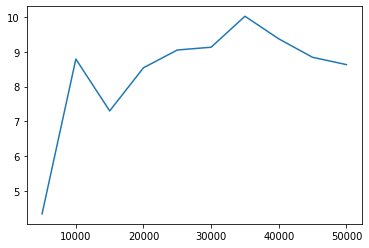

In [0]:
import matplotlib.pyplot as plt

plt.plot(x_to_plot, values_to_plot)

### Testing different parameters

In [0]:
import time

In [0]:
st = time.time()
!python OpenNMT-py/train.py -data En2Fa-Translation/Cleaned -world_size 1 -gpu_rank 0 --rnn_size 1024 --layers 4 --rnn_type LSTM -train_steps 10000
en = time.time()

[2020-06-01 19:43:38,841 INFO]  * src vocab size = 3116
[2020-06-01 19:43:38,841 INFO]  * tgt vocab size = 5908
[2020-06-01 19:43:38,841 INFO] Building model...
[2020-06-01 19:43:48,322 INFO] NMTModel(
  (encoder): RNNEncoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(3116, 500, padding_idx=1)
        )
      )
    )
    (rnn): LSTM(500, 1024, num_layers=4, dropout=0.3)
  )
  (decoder): InputFeedRNNDecoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(5908, 500, padding_idx=1)
        )
      )
    )
    (dropout): Dropout(p=0.3, inplace=False)
    (rnn): StackedLSTM(
      (dropout): Dropout(p=0.3, inplace=False)
      (layers): ModuleList(
        (0): LSTMCell(1524, 1024)
        (1): LSTMCell(1024, 1024)
        (2): LSTMCell(1024, 1024)
        (3): LSTMCell(1024, 1024)
      )
    )
    (attn): GlobalAttention(
      (lin

In [0]:
en - st

3384.543745279312

In [0]:
st = time.time()
!python OpenNMT-py/train.py -data En2Fa-Translation/Cleaned -world_size 1 -gpu_rank 0 --rnn_size 512 --layers 4 --rnn_type LSTM -train_steps 10000
en = time.time()

[2020-06-01 20:40:04,994 INFO]  * src vocab size = 3116
[2020-06-01 20:40:04,994 INFO]  * tgt vocab size = 5908
[2020-06-01 20:40:04,994 INFO] Building model...
[2020-06-01 20:40:08,052 INFO] NMTModel(
  (encoder): RNNEncoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(3116, 500, padding_idx=1)
        )
      )
    )
    (rnn): LSTM(500, 512, num_layers=4, dropout=0.3)
  )
  (decoder): InputFeedRNNDecoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(5908, 500, padding_idx=1)
        )
      )
    )
    (dropout): Dropout(p=0.3, inplace=False)
    (rnn): StackedLSTM(
      (dropout): Dropout(p=0.3, inplace=False)
      (layers): ModuleList(
        (0): LSTMCell(1012, 512)
        (1): LSTMCell(512, 512)
        (2): LSTMCell(512, 512)
        (3): LSTMCell(512, 512)
      )
    )
    (attn): GlobalAttention(
      (linear_in):

In [0]:
en - st

1322.9168176651

In [0]:
st = time.time()
!python OpenNMT-py/train.py -data En2Fa-Translation/Cleaned -world_size 1 -gpu_rank 0 --learning_rate 0.1 --rnn_size 512 --layers 4 --rnn_type LSTM -train_steps 10000
en = time.time()

[2020-06-01 21:02:14,103 INFO]  * src vocab size = 3116
[2020-06-01 21:02:14,104 INFO]  * tgt vocab size = 5908
[2020-06-01 21:02:14,104 INFO] Building model...
[2020-06-01 21:02:16,635 INFO] NMTModel(
  (encoder): RNNEncoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(3116, 500, padding_idx=1)
        )
      )
    )
    (rnn): LSTM(500, 512, num_layers=4, dropout=0.3)
  )
  (decoder): InputFeedRNNDecoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(5908, 500, padding_idx=1)
        )
      )
    )
    (dropout): Dropout(p=0.3, inplace=False)
    (rnn): StackedLSTM(
      (dropout): Dropout(p=0.3, inplace=False)
      (layers): ModuleList(
        (0): LSTMCell(1012, 512)
        (1): LSTMCell(512, 512)
        (2): LSTMCell(512, 512)
        (3): LSTMCell(512, 512)
      )
    )
    (attn): GlobalAttention(
      (linear_in):

In [0]:
en - st

1328.0391142368317

In [0]:
st = time.time()
!python OpenNMT-py/train.py -data En2Fa-Translation/Cleaned -world_size 1 -gpu_rank 0 --optim adam --rnn_size 512 --layers 4 --rnn_type LSTM -train_steps 10000
en = time.time()

[2020-06-01 21:24:26,887 INFO]  * src vocab size = 3116
[2020-06-01 21:24:26,887 INFO]  * tgt vocab size = 5908
[2020-06-01 21:24:26,888 INFO] Building model...
[2020-06-01 21:24:29,371 INFO] NMTModel(
  (encoder): RNNEncoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(3116, 500, padding_idx=1)
        )
      )
    )
    (rnn): LSTM(500, 512, num_layers=4, dropout=0.3)
  )
  (decoder): InputFeedRNNDecoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(5908, 500, padding_idx=1)
        )
      )
    )
    (dropout): Dropout(p=0.3, inplace=False)
    (rnn): StackedLSTM(
      (dropout): Dropout(p=0.3, inplace=False)
      (layers): ModuleList(
        (0): LSTMCell(1012, 512)
        (1): LSTMCell(512, 512)
        (2): LSTMCell(512, 512)
        (3): LSTMCell(512, 512)
      )
    )
    (attn): GlobalAttention(
      (linear_in):

In [0]:
en - st

1442.0429320335388

# Q2: RNN + bpe

### BPE

In [0]:
!python OpenNMT-py/tools/learn_bpe.py -i En2Fa-Translation/Train/train.en -o En2Fa-Translation/Train/BPEtrain.en -s 10000

no pair has frequency >= 2. Stopping


In [0]:
!python OpenNMT-py/tools/learn_bpe.py -i En2Fa-Translation/Train/train.fa -o En2Fa-Translation/Train/BPEtrain.fa -s 10000

no pair has frequency >= 2. Stopping


In [0]:
!python OpenNMT-py/tools/apply_bpe.py -c En2Fa-Translation/Train/BPEtrain.fa -i En2Fa-Translation/Train/train.fa -o En2Fa-Translation/Train/Q2train.fa

In [0]:
!python OpenNMT-py/tools/apply_bpe.py -c En2Fa-Translation/Train/BPEtrain.en -i En2Fa-Translation/Train/train.en -o En2Fa-Translation/Train/Q2train.en

In [0]:
!python OpenNMT-py/tools/apply_bpe.py -c En2Fa-Translation/Train/BPEtrain.fa -i En2Fa-Translation/Dev/dev.fa -o En2Fa-Translation/Dev/Q2dev.fa

In [0]:
!python OpenNMT-py/tools/apply_bpe.py -c En2Fa-Translation/Train/BPEtrain.en -i En2Fa-Translation/Dev/dev.en -o En2Fa-Translation/Dev/Q2dev.en

In [0]:
!python OpenNMT-py/tools/apply_bpe.py -c En2Fa-Translation/Train/BPEtrain.en -i En2Fa-Translation/Test/test.en -o En2Fa-Translation/Test/Q2test.en

### Preprocess

In [0]:
!python OpenNMT-py/preprocess.py -train_src En2Fa-Translation/Train/Q2train.en -train_tgt En2Fa-Translation/Train/Q2train.fa -valid_src En2Fa-Translation/Dev/Q2dev.en -valid_tgt En2Fa-Translation/Dev/Q2dev.fa -save_data En2Fa-Translation/BPE_Cleaned

[2020-06-02 03:01:35,536 INFO] Extracting features...
[2020-06-02 03:01:35,538 INFO]  * number of source features: 0.
[2020-06-02 03:01:35,538 INFO]  * number of target features: 0.
[2020-06-02 03:01:35,538 INFO] Building `Fields` object...
[2020-06-02 03:01:35,538 INFO] Building & saving training data...
[2020-06-02 03:01:35,582 INFO] Building shard 0.
[2020-06-02 03:01:36,306 INFO]  * saving 0th train data shard to En2Fa-Translation/BPE_Cleaned.train.0.pt.
[2020-06-02 03:01:36,957 INFO]  * tgt vocab size: 4885.
[2020-06-02 03:01:36,961 INFO]  * src vocab size: 3041.
[2020-06-02 03:01:37,030 INFO] Building & saving validation data...
[2020-06-02 03:01:37,056 INFO] Building shard 0.
[2020-06-02 03:01:37,061 INFO]  * saving 0th valid data shard to En2Fa-Translation/BPE_Cleaned.valid.0.pt.


### Train

In [0]:
!python OpenNMT-py/train.py -data En2Fa-Translation/BPE_Cleaned -save_model En2Fa-Translation/with_bpe_rnn_model -world_size 1 -gpu_rank 0 --rnn_size 512 --layers 4 --rnn_type LSTM -train_steps 50000

[2020-06-02 03:02:03,953 INFO]  * src vocab size = 3041
[2020-06-02 03:02:03,953 INFO]  * tgt vocab size = 4885
[2020-06-02 03:02:03,953 INFO] Building model...
[2020-06-02 03:02:13,668 INFO] NMTModel(
  (encoder): RNNEncoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(3041, 500, padding_idx=1)
        )
      )
    )
    (rnn): LSTM(500, 512, num_layers=4, dropout=0.3)
  )
  (decoder): InputFeedRNNDecoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(4885, 500, padding_idx=1)
        )
      )
    )
    (dropout): Dropout(p=0.3, inplace=False)
    (rnn): StackedLSTM(
      (dropout): Dropout(p=0.3, inplace=False)
      (layers): ModuleList(
        (0): LSTMCell(1012, 512)
        (1): LSTMCell(512, 512)
        (2): LSTMCell(512, 512)
        (3): LSTMCell(512, 512)
      )
    )
    (attn): GlobalAttention(
      (linear_in):

### Test

In [0]:
!python OpenNMT-py/translate.py -model En2Fa-Translation/with_bpe_rnn_model_step_50000.pt -src En2Fa-Translation/Test/Q2test.en -output En2Fa-Translation/BPEpred.txt -replace_unk -verbose

[2020-06-02 03:46:51,736 INFO] Translating shard 0.
/pytorch/aten/src/ATen/native/BinaryOps.cpp:66: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.

SENT 1: ['hello', ',', 'do', 'we', 'drive', 'together', 'to', 'Hanover', 'on', 'the', 'twenty-eighth', 'of', 'March', '?']
PRED 1: سلام ، ما میتوانیم تا Hanover در دفترم Hanover ؟
PRED SCORE: -3.7620

SENT 2: ['it', 'is', 'more', 'comfortable', 'by', 'train', '.']
PRED 2: این به تعداد زمانی نزدیک است .
PRED SCORE: -1.8948

SENT 3: ['do', 'you', 'go', 'by', 'car', 'and', 'I', 'go', 'by', 'train', '?']
PRED 3: آیا شما با قطار و من پرواز میکنم ؟
PRED SCORE: -3.3481

SENT 4: ['I', 'would', 'like', 'to', 'go', 'by', 'train', '.', 'and', 'what', 'would', 'you', 'like', '?']
PRED 4: من مایلم با قطار . و چه موقع . شما چه ترجیح میدهید ؟
PRED SCORE: -1.9212

SENT 5: ['if', 'we', 'take', 'the', '$I-$C-$

In [0]:
!sed -i "s/@@ //g"  En2Fa-Translation/BPEpred.txt

In [0]:
!perl  OpenNMT-py/tools/multi-bleu.perl En2Fa-Translation/Test/test.fa0 En2Fa-Translation/Test/test.fa1 En2Fa-Translation/Test/test.fa2 En2Fa-Translation/Test/test.fa3 < En2Fa-Translation/BPEpred.txt

BLEU = 23.43, 61.6/30.7/17.1/9.4 (BP=0.996, ratio=0.996, hyp_len=2631, ref_len=2641)


# Part 2: Transliteration

In [0]:
fixed_values = []
with open('Transliteration/train.fa', 'r') as fp:
  content = fp.read().split('\n')
  for this_sent in content:
    this_sent_fixed = []
    for this_char in this_sent:
      if this_char == ' ':
        this_sent_fixed.append('<b>')
      else:
        this_sent_fixed.append(this_char)
      this_sent_fixed.append(' ')
    this_sent_joined = ' '.join(this_sent_fixed)
    this_sent_joined = this_sent_joined.strip()
    fixed_values.append(this_sent_joined)

with open('Transliteration/fixed_train.fa', 'w') as fp:
  for v in fixed_values:
    fp.write(v+'\n')

In [0]:
fixed_values = []
with open('Transliteration/dev.fa', 'r') as fp:
  content = fp.read().split('\n')
  for this_sent in content:
    this_sent_fixed = []
    for this_char in this_sent:
      if this_char == ' ':
        this_sent_fixed.append('<b>')
      else:
        this_sent_fixed.append(this_char)
      this_sent_fixed.append(' ')
    this_sent_joined = ' '.join(this_sent_fixed)
    this_sent_joined = this_sent_joined.strip()
    fixed_values.append(this_sent_joined)

with open('Transliteration/fixed_dev.fa', 'w') as fp:
  for v in fixed_values:
    fp.write(v+'\n')

In [0]:
fixed_values = []
with open('Transliteration/test.fa', 'r') as fp:
  content = fp.read().split('\n')
  for this_sent in content:
    this_sent_fixed = []
    for this_char in this_sent:
      if this_char == ' ':
        this_sent_fixed.append('<b>')
      else:
        this_sent_fixed.append(this_char)
      this_sent_fixed.append(' ')
    this_sent_joined = ' '.join(this_sent_fixed)
    this_sent_joined = this_sent_joined.strip()
    fixed_values.append(this_sent_joined)

with open('Transliteration/fixed_test.fa', 'w') as fp:
  for v in fixed_values:
    fp.write(v+'\n')

In [13]:
!python OpenNMT-py/preprocess.py -train_src Transliteration/fixed_train.fa -train_tgt Transliteration/train.en -valid_src Transliteration/fixed_dev.fa -valid_tgt Transliteration/dev.en -save_data Transliteration/Cleaned

[2020-06-02 05:09:31,668 INFO] Extracting features...
[2020-06-02 05:09:31,982 INFO]  * number of source features: 0.
[2020-06-02 05:09:31,983 INFO]  * number of target features: 0.
[2020-06-02 05:09:31,983 INFO] Building `Fields` object...
[2020-06-02 05:09:31,983 INFO] Building & saving training data...
[2020-06-02 05:09:32,279 INFO] Building shard 0.
[2020-06-02 05:09:32,704 INFO]  * saving 0th train data shard to Transliteration/Cleaned.train.0.pt.
[2020-06-02 05:09:33,106 INFO]  * tgt vocab size: 6065.
[2020-06-02 05:09:33,106 INFO]  * src vocab size: 43.
[2020-06-02 05:09:33,165 INFO] Building & saving validation data...
[2020-06-02 05:09:33,511 INFO] Building shard 0.
[2020-06-02 05:09:33,542 INFO]  * saving 0th valid data shard to Transliteration/Cleaned.valid.0.pt.


In [14]:
!python OpenNMT-py/train.py -data Transliteration/Cleaned -save_model Transliteration/rnn_model -world_size 1 -gpu_rank 0 --rnn_size 512 --layers 4 --rnn_type LSTM -train_steps 50000

[2020-06-02 05:10:07,566 INFO]  * src vocab size = 43
[2020-06-02 05:10:07,566 INFO]  * tgt vocab size = 6065
[2020-06-02 05:10:07,566 INFO] Building model...
[2020-06-02 05:10:17,519 INFO] NMTModel(
  (encoder): RNNEncoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(43, 500, padding_idx=1)
        )
      )
    )
    (rnn): LSTM(500, 512, num_layers=4, dropout=0.3)
  )
  (decoder): InputFeedRNNDecoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(6065, 500, padding_idx=1)
        )
      )
    )
    (dropout): Dropout(p=0.3, inplace=False)
    (rnn): StackedLSTM(
      (dropout): Dropout(p=0.3, inplace=False)
      (layers): ModuleList(
        (0): LSTMCell(1012, 512)
        (1): LSTMCell(512, 512)
        (2): LSTMCell(512, 512)
        (3): LSTMCell(512, 512)
      )
    )
    (attn): GlobalAttention(
      (linear_in): Lin

In [15]:
!python OpenNMT-py/translate.py -model Transliteration/rnn_model_step_50000.pt -src Transliteration/fixed_test.fa -output Transliteration/Transliteration_pred.txt -replace_unk -verbose

[2020-06-02 06:06:31,499 INFO] Translating shard 0.
/pytorch/aten/src/ATen/native/BinaryOps.cpp:66: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.

SENT 1: ['ن', 'ظ', 'ر', 'ت', '<b>', 'ب', 'ر', 'ا', 'م', '<b>', 'م', 'ه', 'م', 'ه']
PRED 1: nazaret baraam bege
PRED SCORE: -0.1868

SENT 2: ['چ', 'و', 'ن', '<b>', 'د', 'و', 'س', 'ت', '<b>', 'ن', 'د', 'ا', 'ر', 'م', '<b>', 'د', 'ر', 'گ', 'ی', 'ر', '<b>', 'ا', 'ح', 'س', 'ا', 'س', 'ا', 'ت', '<b>', 'ب', 'ا', 'ش', 'ی', '<b>', 'و', '<b>', 'ت', 'ص', 'م', 'ی', 'م', '<b>', 'ب', 'گ', 'ی', 'ر', 'ی', '<b>', 'ن', 'م', 'ی', '\u200c', 'د', 'و', 'ن', 'م', '<b>', 'م', 'ن', 'ظ', 'و', 'ر', 'م', '<b>', 'ر', 'و', 'ش', 'ن', 'ه', '<b>', 'ی', 'ا', '<b>', 'ن', 'ه']
PRED 2: chon dust nadaaram dar e ehsaasaat baashi o taslim nemidunam
PRED SCORE: -1.8105

SENT 3: ['ف', 'ر', 'و', 'غ', '<b>', 'ب', 'ه', '\u200c', 'ص', 'و'

In [16]:
!perl  OpenNMT-py/tools/multi-bleu.perl Transliteration/test.en < Transliteration/Transliteration_pred.txt

BLEU = 26.38, 67.3/44.1/30.4/21.4 (BP=0.708, ratio=0.743, hyp_len=9475, ref_len=12751)


In [21]:
!pip install editdistance==0.3.1

  Created wheel for editdistance: filename=editdistance-0.3.1-cp36-cp36m-linux_x86_64.whl size=186660 sha256=6112361d6b6aeb0f32367ef206b710d021069f29628226996f5cb73ab2d2f705
  Stored in directory: /root/.cache/pip/wheels/c8/02/5e/65498155acc7b20ecaaf50daec563c78b58a32272f7cbd82ba
Successfully built editdistance
  Found existing installation: editdistance 0.5.3
    Uninstalling editdistance-0.5.3:
      Successfully uninstalled editdistance-0.5.3


In [0]:
import editdistance

In [0]:
goal_sentences, predicted_sentences = [], []
distance_values = []
with open('Transliteration/test.en', 'r') as fp:
  goal_sentences = fp.read().split('\n')
with open('Transliteration/Transliteration_pred.txt', 'r') as fp:
  predicted_sentences = fp.read().split('\n')

for sent_id in range(len(goal_sentences)):
  s1 = goal_sentences[sent_id]
  s2 = predicted_sentences[sent_id]
  d = editdistance.eval(s1, s2)
  distance_values.append(d)

In [25]:
distance_values[0]

5

In [27]:
sum(distance_values)/len(distance_values), min(distance_values), max(distance_values)

(31.034, 0, 204)

In [28]:
import statistics
statistics.median(distance_values)

16.0